## Context

Enakl is a bus sharing transportation solution that focuses on offering a reliable, comfortable and secure mobility service for commuters: Based on what we think the market of workers needs (mobility from home to work and vice versa), we create lines and open them for reservations (pre-booking). Our objective is to have at least 50% fill rate for our 20-seats buses and to ensure high customer satisfaction ratings.  


You have access to a google sheet that has all the bookings from this year.

The data should be self-explanatory.
Not all columns are needed for this challenge.

Some important specifications:

- date_booking captures when the user books a ride (either directly via the app or indirectly when a support agent or a manager does that for them)
- date_ride captures the actual date of the ride
- A booking can be canceled (by the user directly or an agent/manager) as long as the day/time of the booked ride didn't happen.
- If a booking is not canceled and the user doesn't show up the day/time of the ride, the driver cancels the ride and the `booking_status` will be logged as 'Canceled by driver'
- Once a ride is done (user dropped off at destination point), we ask the user to rate the service and the driver via the app
- date_joined captures when the user installed the app and created an account



## Asks:


### Requirement 1: Business Curiosity & Data Insights

Conduct some exploratory data analysis (EDA) to understand the data further and uncover some insights.
Explain what you did and why.
Summaries the insights you found.  


### Requirement 2: Busline performance (You have to write the query using SQL)

As mentioned in the introduction, we care a lot about having a high enough fill-rate of our buses (at least 50%) to ensure that we are profitable.

We want to analyse how our current buslines are performing by doing the following:

For each line:
- We want to find out when it was launched
- We will call the week of the launch week_0 (week is from monday to sunday)
- Then for each week, we want to calculate the average fill rate during that week

The fill rate for a busline on a given day represents the percentage of occupied seats: If for busline X on 15/12/2023, we had 10 passengers, that means the fill rate for that day is 50% (all buses have 20 seats)

**IMPORTANT:** All of those metrics have to be calculated using sql in one query

The results should be displayed as:
- Pivot table with the buslines captured as row, the weeks as columns and the average weekly fill rates as metrics
- Choose another visualisation to communicate the resutls


### Requirement 3: Conclusions and perspectives

Summarise in 5 sentences what you've learned from the data and what you think we should explore and focus on next, and why.

# Importing the essential libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the Excel file and store the data in a dataframe

In [ ]:
df = pd.read_excel('/content/sample_data/bookings_data.xlsx')

# Preprocessing data through droppimg duplicates, fill Null values and drop unnecessary columns

### I dropped IDs columns that wouldn't help me in further analysis, and just left one date field to identify trends on it, also one rating field to ensure clients satisfaction on it and i found service_rate would be more general to cover level of users' satisfaction,
### also dropped the 4 address fields that wouldn't be important for our analysis, the price and payment_mode and discount fields would just help me if the analysis was more deeper in cost and profit so i wouldnt euse them here.

In [ ]:
df = df.drop_duplicates()
df = df.fillna('not_specified')
df = df.drop(['booking_id','date_booking','date_cancellation','user_id','date_joined','address_origin','address_destination','initial_price','payment_mode','discount_code','address_pickup','address_dropoff','is_user_anonymized', 'rating_driver'], axis=1)

In [ ]:
df

,booked_from,number_passengers,booking_status,date_ride,busline_name,driver_name,rating_service
0,CALL_CENTER,1,Ride Confirmed,2023-10-16,LV AZHAR > BSK (via S.MOUMEN-CN) 05-23,ANASS BARIGOU,not_specified
1,APP,1,Ride Confirmed,2023-10-16,LV MOHA > BSK (via Beauséjour-CN) 05-23,younes belkbir,not_specified
2,CALL_CENTER,1,Ride Confirmed,2023-10-16,LV AZHAR > BSK (via S.MOUMEN-CN) 05-23,ANASS BARIGOU,not_specified
3,APP,1,Ride Confirmed,2023-10-16,LV MOHA > BSK (via Beauséjour-CN) 05-23,younes belkbir,not_specified
4,CALL_CENTER,1,Cancelled by driver,2023-10-16,LV BERN> BSK (via CN-BOURNAZIL-H.MO-A.SEB) 07-23,RACHID NAHHAL,not_specified
...,...,...,...,...,...,...,...
17717,CALL_CENTER,1,Ride Confirmed,2023-12-09,LV Z.I Ain sebaa > Salmiya (Via Moulay Rachid ...,Othmane JAMAE,not_specified
17718,CALL_CENTER,1,Ride Confirmed,2023-12-09,LV Z.I Ain sebaa > Salmiya (Via Moulay Rachid ...,Othmane JAMAE,not_specified
17719,CALL_CENTER,1,Cancelled by client,2023-12-09,LV Z.I Ain sebaa > Derb Ghallef (Via Houbouss ...,Adnane OUARDI,not_specified
17720,CALL_CENTER,1,Ride Confirmed,2023-12-09,LV Z.I Ain sebaa > Derb Ghallef (Via Houbouss ...,Adnane OUARDI,not_specified


# **Requirement 1: EDA**

**Explore some useful insights in data, EX. 'booked_from' values :**

**We showed the percentage of each used method to find which method oftenly used,
here we found the mobile app is the most used method so,**

*   we can reach more clients throuh if we want to notify cutomers of any updates or important news

*   In addition we found website users percentage is so small so we could replace it with another method or unconsider it as a method to use for booking


*   Instead we can concetrate on the Call_Center team, the mobile app by adding more features to it for instance


*   If the company wants to consider also the website method we could imporove it by making it more usable and learnable for users so they can find it easy to book through

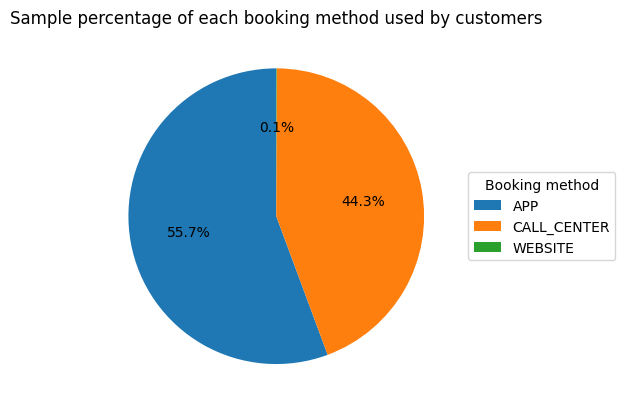

In [ ]:
category_counts = df['booked_from'].value_counts()
wedges, texts, autotexts = plt.pie(category_counts, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, category_counts.index, title="Booking method", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Sample percentage of each booking method used by customers')
plt.show()

**Explore 'booked_status' values :**

**We showed number of clients for each status to find the number of confirmed and cancelled rides acroos our buslines, we found that almost 90% of rides are confimred and 10% are cancelled or changed so,**

* Most of cancellations were by the clients, then almost equally cancellation by the admin and driver  

* We can controle cancellation by drivers to decrease the percentage of it by making it mandatory for clients to specify the ride date during their booking, else not completing the booking process, to avoid more cancellations by drivers


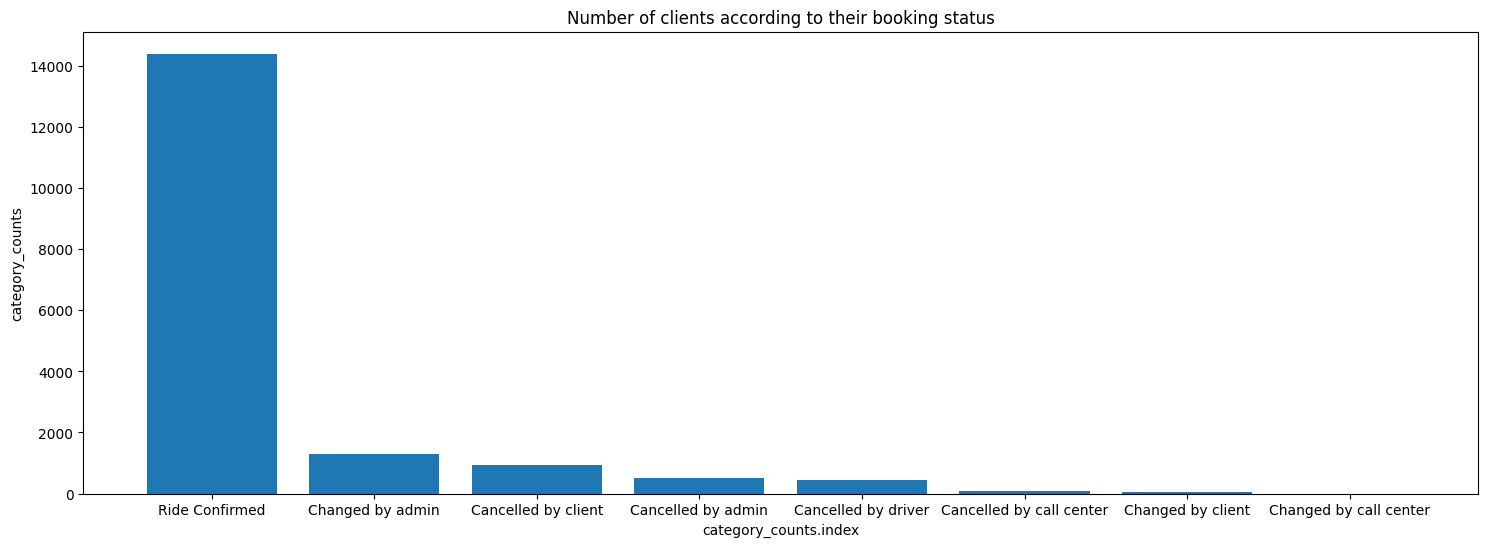

In [ ]:
category_counts = df['booking_status'].value_counts()

fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(category_counts.index, category_counts)

plt.xlabel('category_counts.index')
plt.ylabel('category_counts')
plt.title('Number of clients according to their booking status')
plt.show()

**Explore 'date_ride' values :**

**We showed the rides we made across 2023, and we found that most rides were in the period of the last quarter specially from 'November' to 'December' so,**

* The company should take this period in consedrartion and ensure before it that there are enough buses and increase it if needed

* If there are any maintainance needed for buslines company should ensure to complete it before this period to be sure we could cover all rides


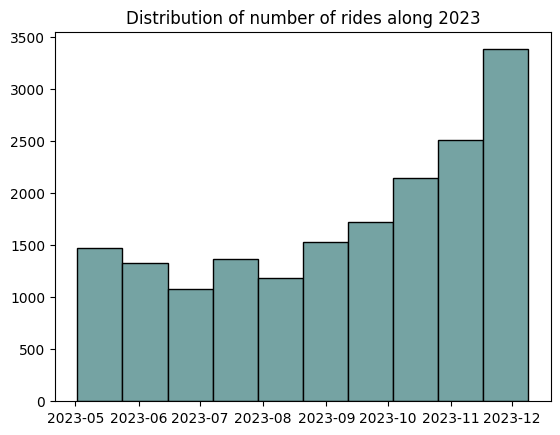

In [ ]:
plt.hist(df['date_ride'], color='#75a3a3', edgecolor='black')
plt.title('Distribution of number of rides along 2023')
plt.show()

**Explore 'rating_service' values :**

**As mentioned, level of users' satisfaction is important thing to know about so, We showed the different ratings that users give to the service and we found that almost 95% of users with confirmed rides status didn't specify their rating so,**

* We could encourage users to rate the rides through opening special features to them after rating, such as making them choose the driver or busline in their next ride for example

Thats a good indicator to find that rating '5' is the most chosen by the users who rated the service


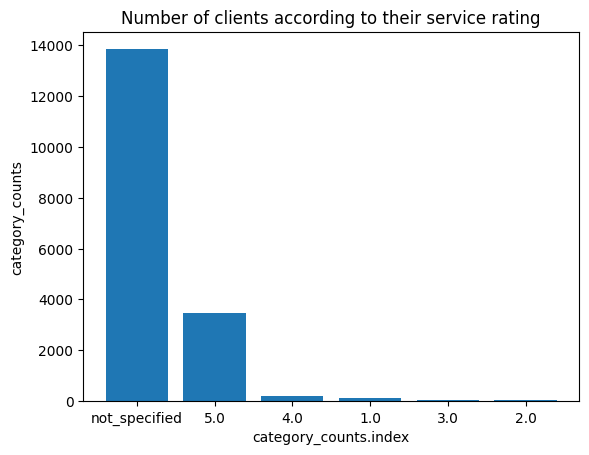

In [ ]:
category_counts = df['rating_service'].value_counts()

plt.bar(category_counts.index.astype(str), category_counts)

plt.xlabel('category_counts.index')
plt.ylabel('category_counts')
plt.title('Number of clients according to their service rating')
plt.show()

# **Requirement 2: Busline performance**

### Install and import needed ibraries to use sqllite in colab

In [ ]:
pip install --upgrade sqlalchemy

In [ ]:
from sqlalchemy import create_engine
import sqlalchemy

## Establish the sql environment connection, convert the created dataframe to a relational database table and excecute the required query to get



*   The weeks of the year busline works in

*   The busline name

*   The working weeks of the busline using window function 'ROW_NUMBER' extracted by 1 to start from 'week_0' as required

*   The average fill of each busline for each week by getting sum of 'passengers_num' ([passengers num /140*100] % = passengers num %) as total maximum fill avg needed for each week = 100 seats (20 seats for each day of the week)



In [ ]:
engine = create_engine('sqlite://', echo=False)
conn = engine.connect()

df.to_sql('Bookings_Data', con=engine, if_exists='replace', index=False)

# to make the week starts from monday to sunday
conn.execute(sqlalchemy.sql.text('PRAGMA foreign_keys=OFF'))
conn.execute(sqlalchemy.sql.text('PRAGMA recursive_triggers=ON'))
conn.execute(sqlalchemy.sql.text('PRAGMA cache_size=100000'))
conn.execute(sqlalchemy.sql.text('PRAGMA page_size=4096'))
conn.execute(sqlalchemy.sql.text('PRAGMA user_version=5'))
conn.execute(sqlalchemy.sql.text('PRAGMA encoding="UTF-8"'))

query_result = conn.execute(sqlalchemy.sql.text('''SELECT 'Year_Week_' || (CAST((julianday(date_ride) - julianday(date_ride, 'start of year')) / 7 AS INTEGER)) AS week_of_year,
busline_name, 'Week_' || (ROW_NUMBER() OVER (PARTITION BY busline_name ORDER BY number_passengers) - 1) AS week_of_work,
(CAST(SUM(number_passengers) / 140.0 * 100 AS INTEGER)) || '%' AS avg_fill
FROM Bookings_Data WHERE booking_status = 'Ride Confirmed' GROUP BY 2,1 ORDER BY 2,1''')).fetchall()
print(query_result)

conn.close()

[('Year_Week_21', 'LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) 05-23', 'Week_0', '8%'), ('Year_Week_22', 'LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) 05-23', 'Week_1', '3%'), ('Year_Week_23', 'LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) 05-23', 'Week_2', '2%'), ('Year_Week_24', 'LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) 05-23', 'Week_3', '5%'), ('Year_Week_25', 'LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) 05-23', 'Week_4', '1%'), ('Year_Week_26', 'LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) 05-23', 'Week_5', '5%'), ('Year_Week_27', 'LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) 05-23', 'Week_6', '2%'), ('Year_Week_21', 'LF BSK > CN > MOHAMEDIA 05-23', 'Week_0', '13%'), ('Year_Week_22', 'LF BSK > CN > MOHAMEDIA 05-23', 'Week_1', '20%'), ('Year_Week_19', 'LF DARB > CN (via Errahma > Lissasfa) 05-23', 'Week_0', '1%'), ('Year_Week_20', 'LF DARB > CN (via Errahma > Lissasfa) 05-23', 'Week_1', '0%'), ('Year_Week_21', 'LV - OULFA > HH > CN 05-23', 'Week_0', '21%'), ('Year_Week_2

# convert query result to a new dataframe

In [ ]:
result_df = pd.DataFrame(query_result)
result_df

,week_of_year,busline_name,week_of_work,avg_fill
0,Year_Week_21,LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) ...,Week_0,8%
1,Year_Week_22,LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) ...,Week_1,3%
2,Year_Week_23,LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) ...,Week_2,2%
3,Year_Week_24,LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) ...,Week_3,5%
4,Year_Week_25,LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) ...,Week_4,1%
...,...,...,...,...
597,Year_Week_19,ZZZRAB CN > HH OULFA 05-23,Week_2,13%
598,Year_Week_20,ZZZRAB CN > HH OULFA 05-23,Week_3,17%
599,Year_Week_18,ZZZRAB MOH > CN (graphiqué),Week_0,0%
600,Year_Week_17,ZZZTEST - FREE - MOHAMMEDIA (retour) > Zenith ...,Week_0,2%


### Save the query result dataframe to Excel file to do further analysis and visualization by pivot table and charts

In [ ]:
result_df.to_excel('/content/sample_data/bookings_data_result.xlsx', index=False, engine='openpyxl')

##Excel file result after some transformation and sorting and pivot table screenshots.

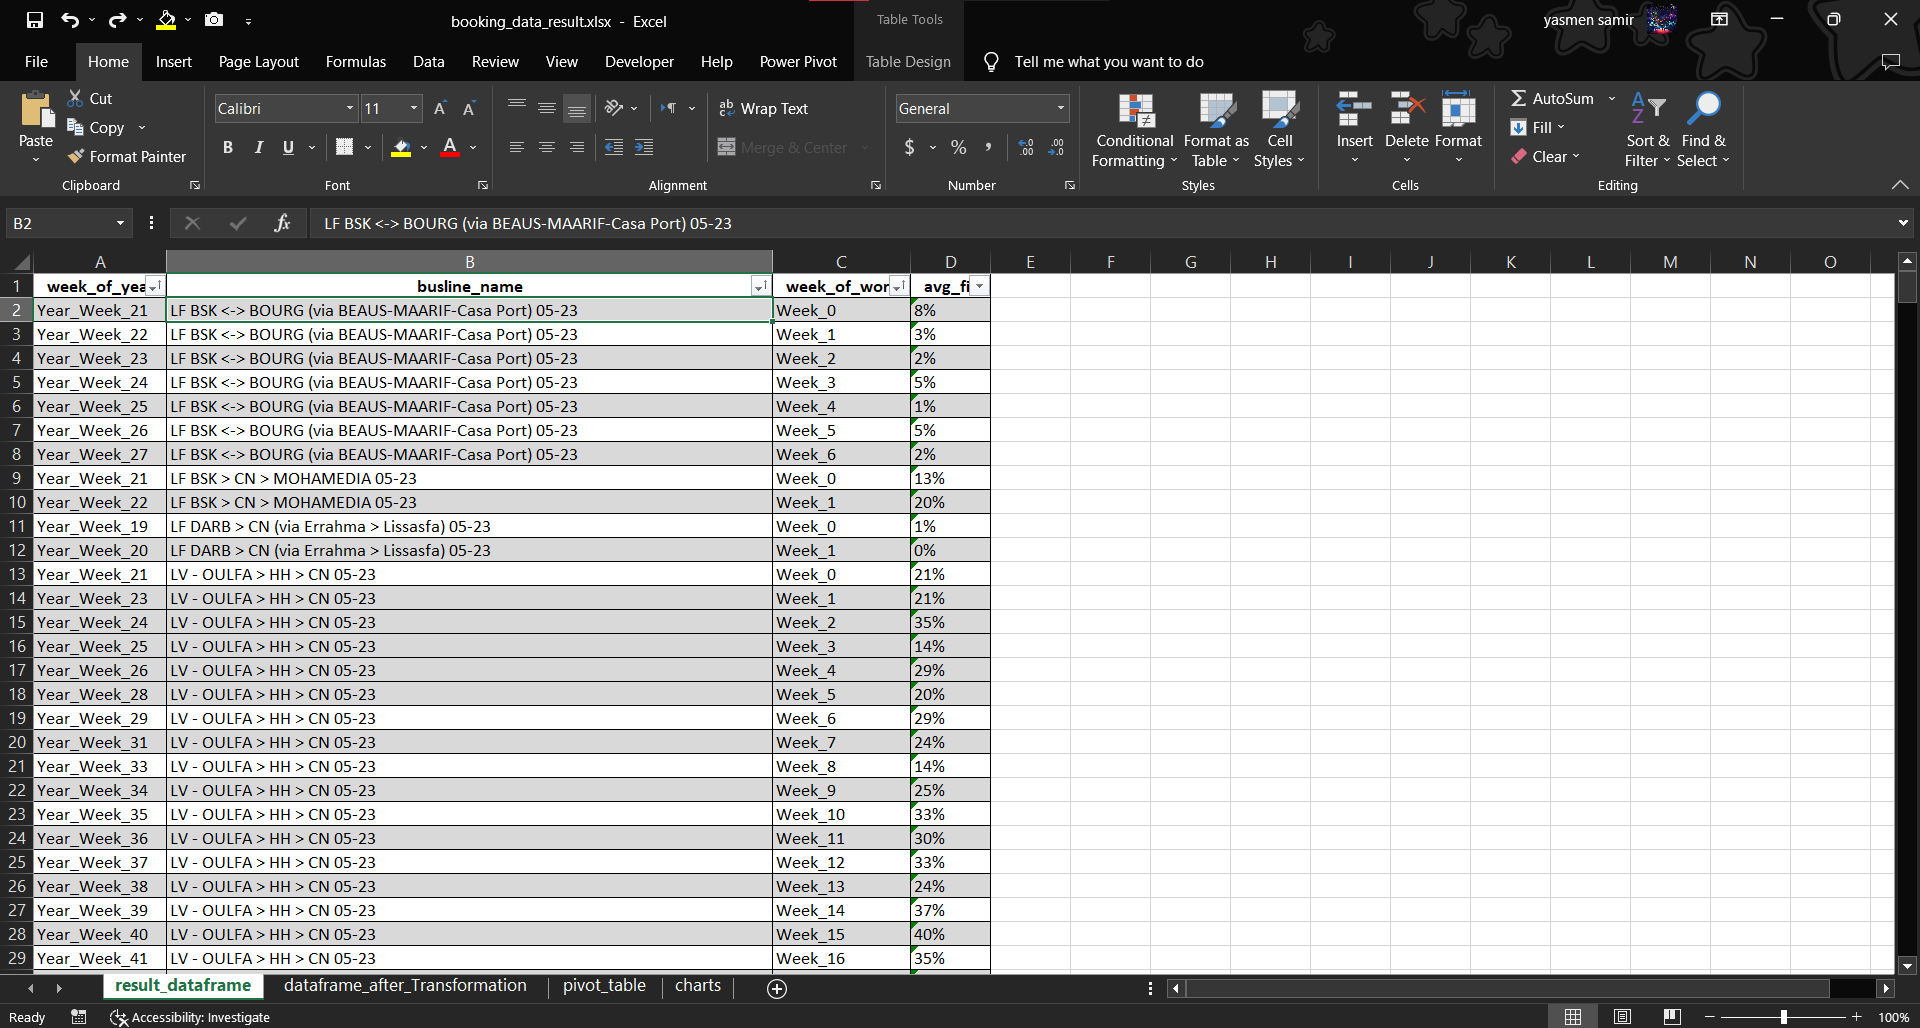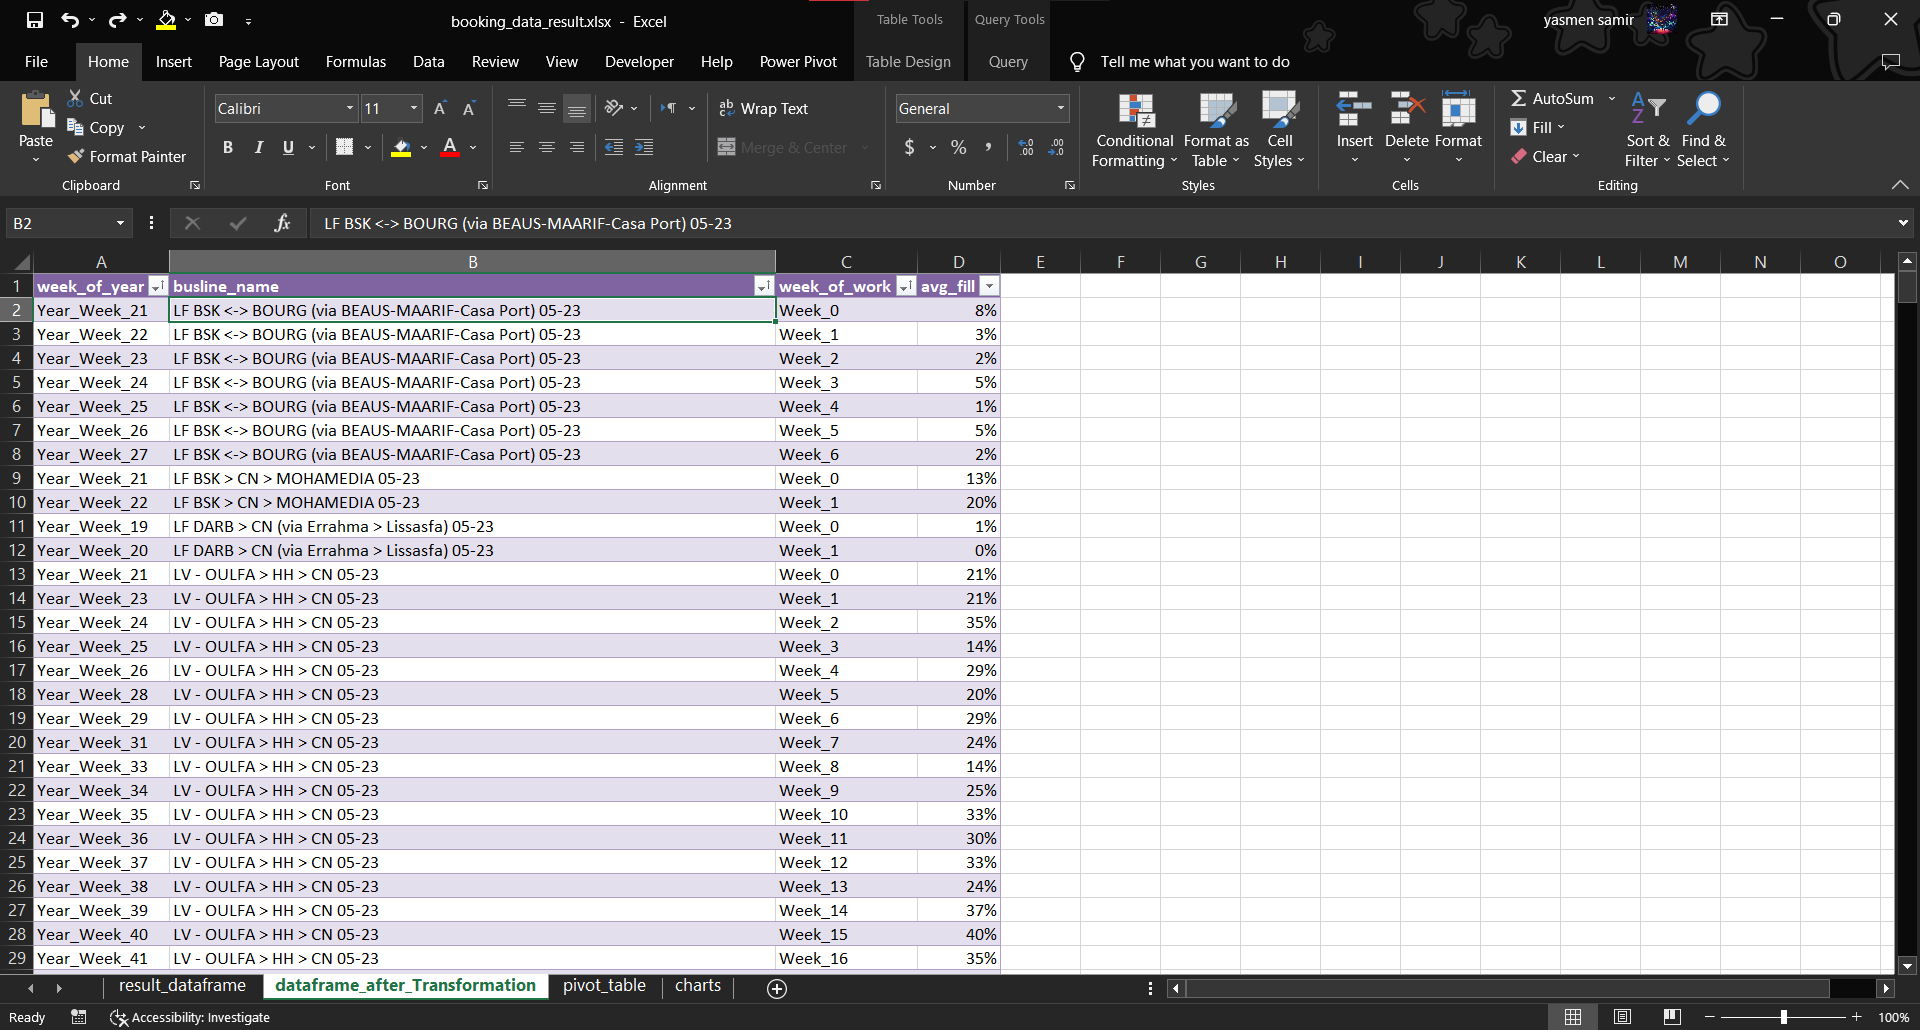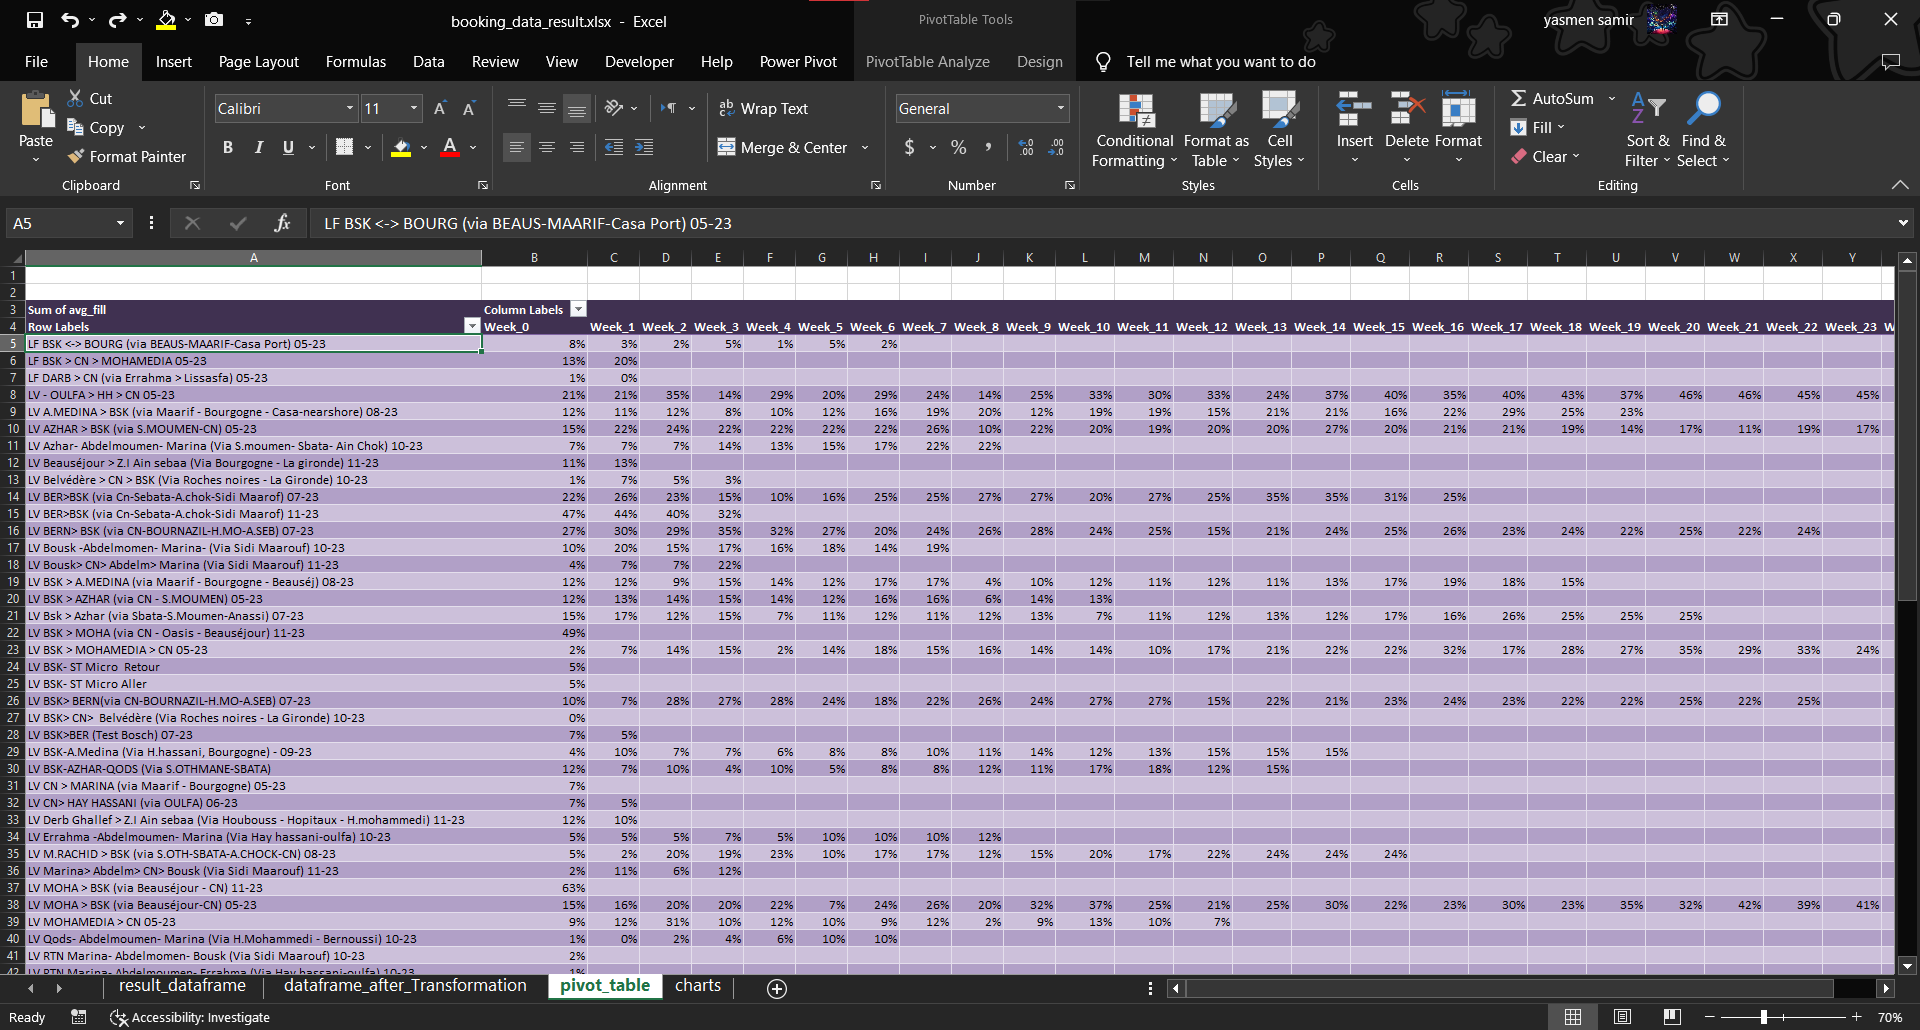

## Some charts screenshots that visualize the pivot table result



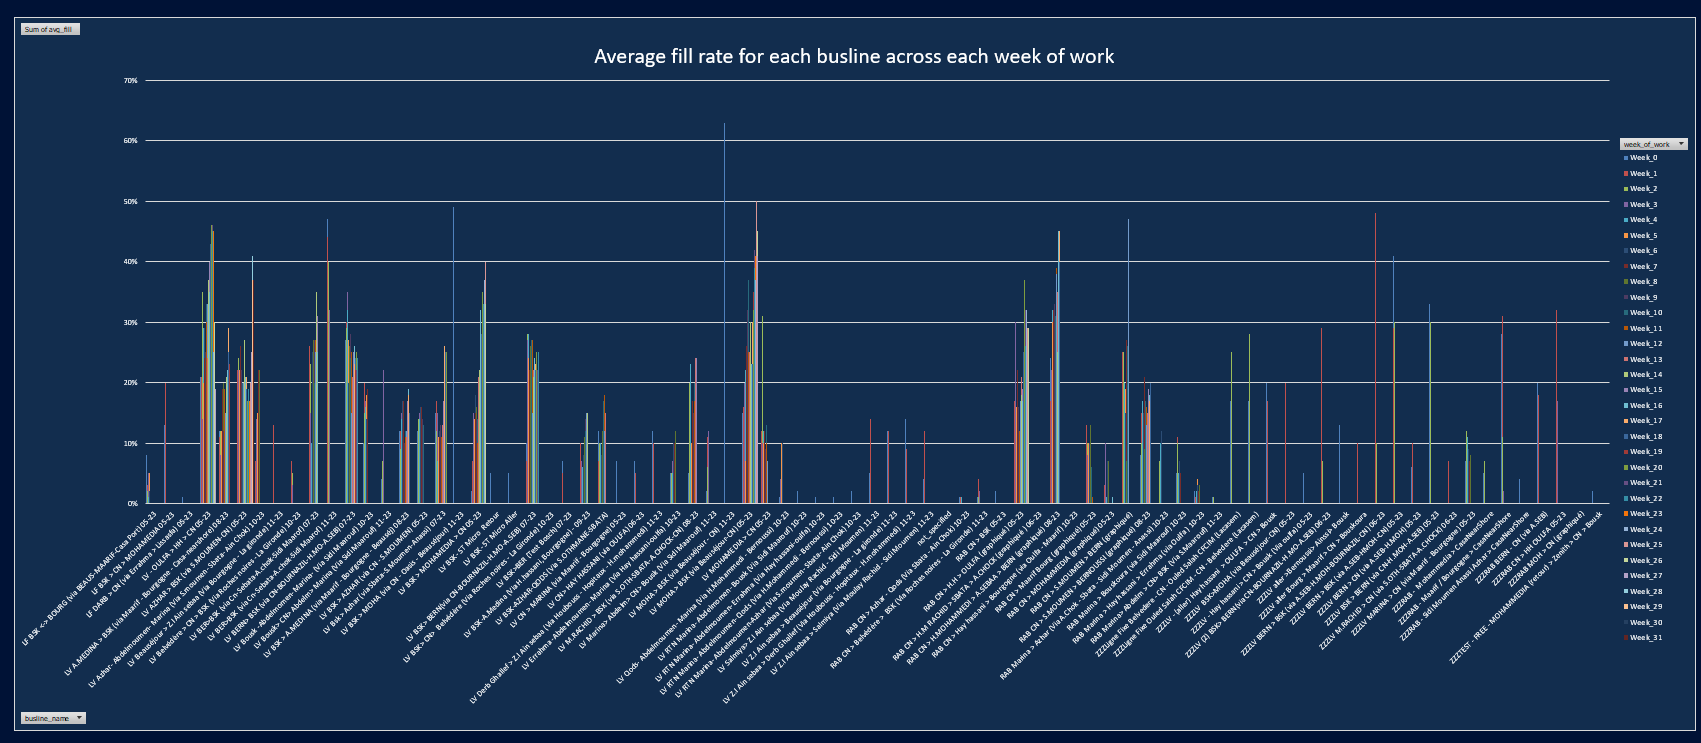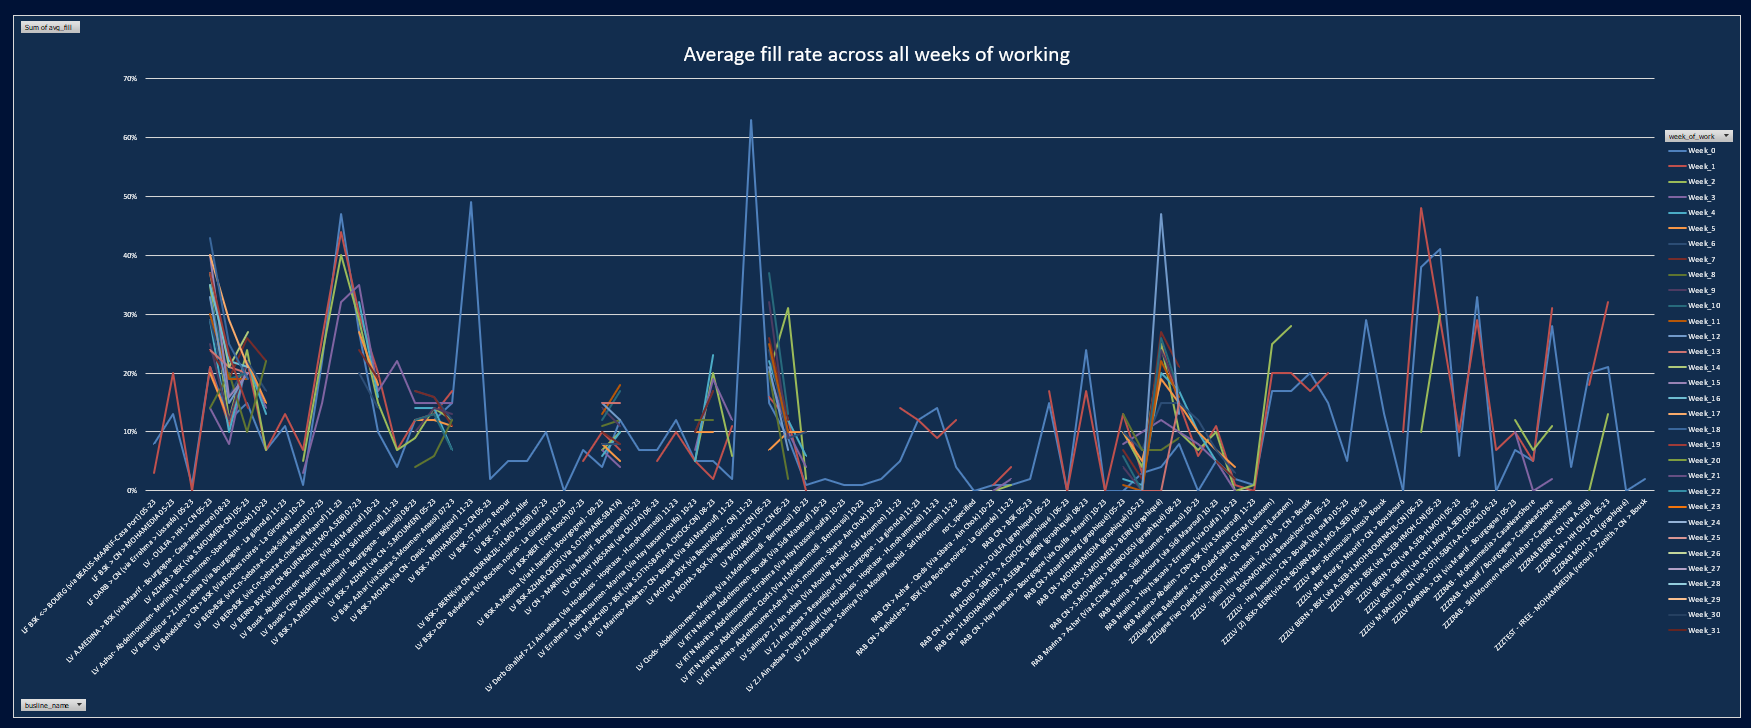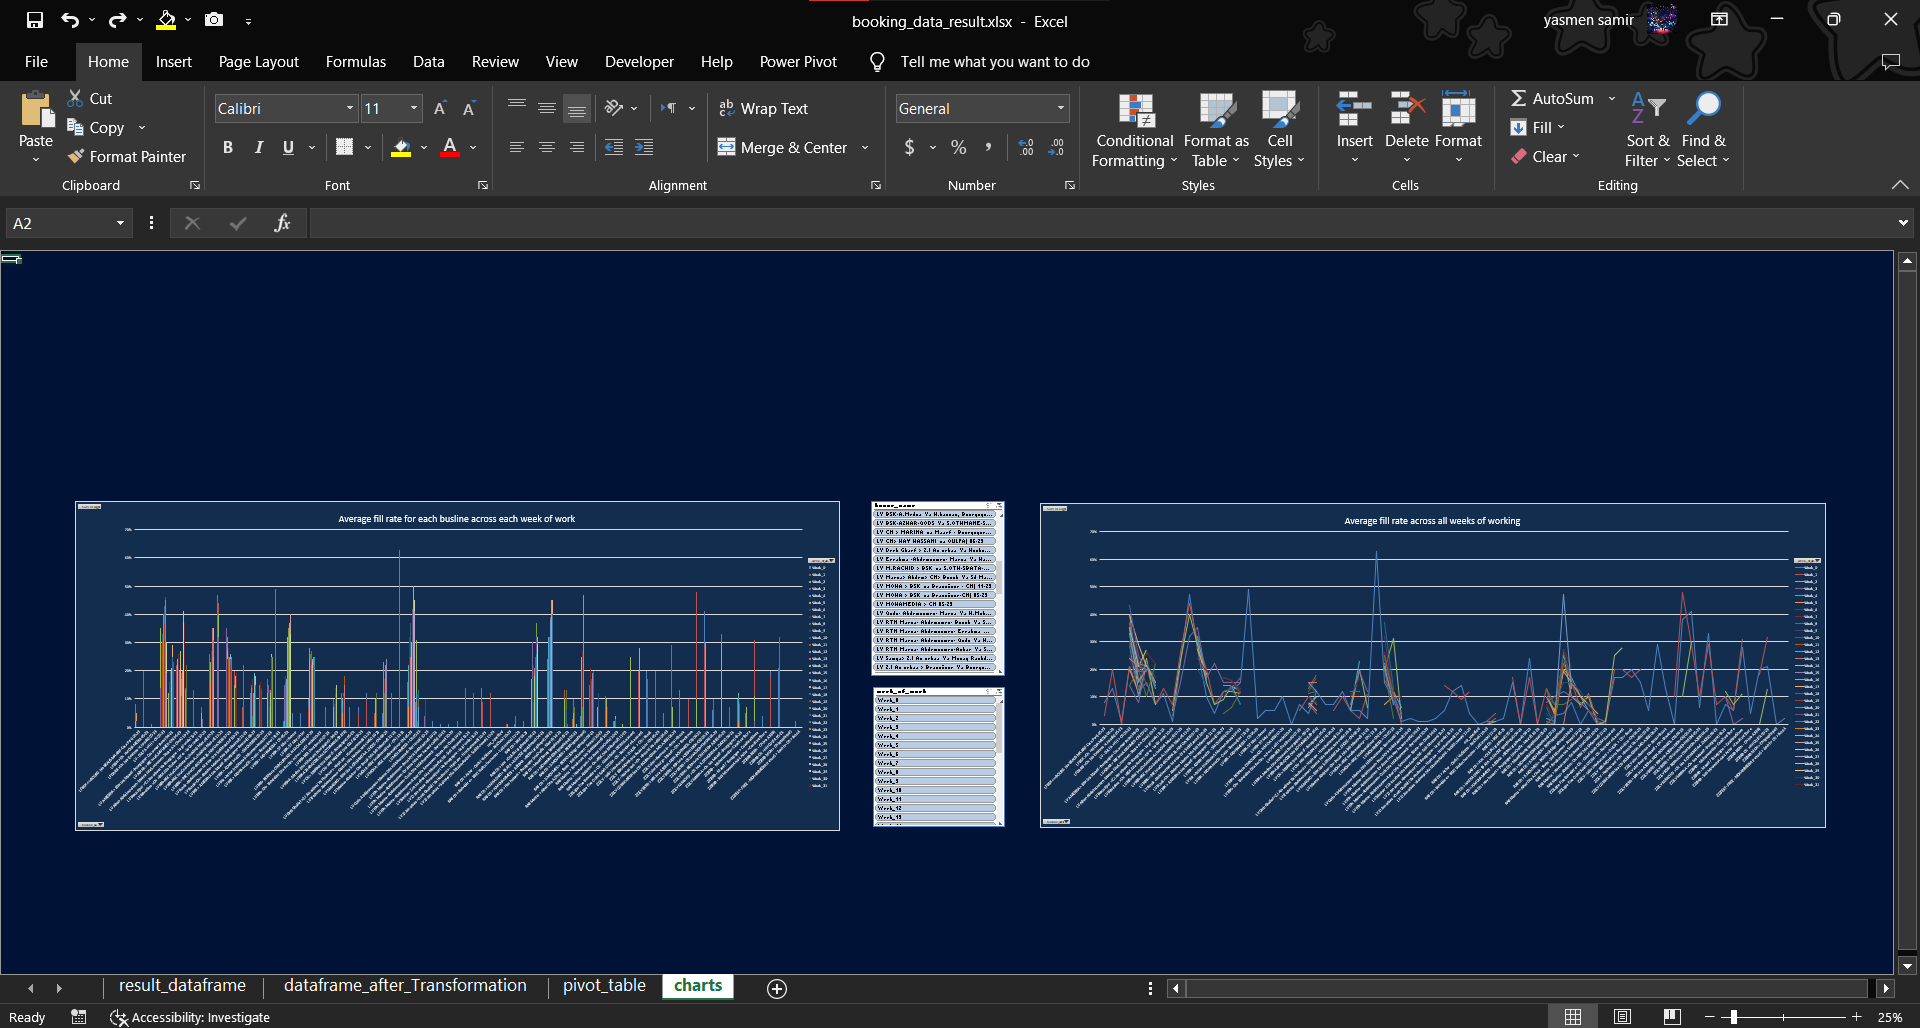

# **Requirement 3: Conclusions and perspectives**

*   **From the result data, just one busline "LV MOHA > BSK (via Beauséjour-CN) 05-23", exceeds the fill average rate in two of its working weeks with 50% and 63% avg rate in week_0 and week_25**

*  **Company should make some updates to encourage more passengers to use the buslines, like maintain the buses and add more services to make them more comfortable for users**

*   **Company could make use of some solutions we suggested in EDA like update the app and add more features to it to make it easy and encouraging for users to book easily**

*   **Company can also reduce the cost of rides and make more discounts in months from September to December as number of rides were increasing in that period to encourage passengers use the buslines more**


*   **In months July, August, number of rides were little in this period so, company may provide air conditioners to buses in this period to ensure passengers are more comfortable with our services**